# Band structure of honeycomb lattice

In [30]:
# Thermal emitter# reload automaticaly so that any changes in the python files of 'functions.py' will be updated without restarting the kernel
%load_ext autoreload
%autoreload 2

# to acutally see the matplotlib plots instead of something like <matplotlib.figure.Figure at 0x7f5420169b38>
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import sys
root_folder = '../src'
sys.path.insert(1, root_folder) # insert at 1, 0 is the script path (or '' in REPL)

import warnings
warnings.filterwarnings("ignore")

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from params import Params

In [33]:
def R(x,y,x_tab):  
    r = np.linalg.norm(np.subtract(x_tab,np.array([x,y])),axis=1)
    r_min = np.min(r)
   
    p = 8.0
    d = 0.5
    y = -p*m.exp(-r_min**2/d**2)

    return y

def honeycomb_1d(params): 
    x_tab = params.b*np.array([[0, 0],[0.5, 0.5*m.sqrt(3)], [1.5, 0.5*m.sqrt(3)],[2, 0]])

    for ii in range(params.Nx-1):
        x_shift = np.add(x_tab[0:4], (ii+1)*(params.a1+params.a2))
        x_tab = np.vstack((x_tab, x_shift))
        
    x_center = (1/m.sqrt(3))*(float(params.Nx) * 1.5 - 0.5)
    y_center = 0.5
    
    for ii in range(params.Nx*4):
        x_tab[ii,0] -= x_center
        x_tab[ii,1] -= y_center
        
    return x_tab

def honeycomb_2d(params): 
    x_tab = honeycomb_1d(params)
    
    for ii in range(params.Ny-1):
        x_shift = np.add(x_tab[0:4*params.Nx], (ii+1)*(params.a1-params.a2))
        x_tab = np.vstack((x_tab, x_shift))

    return x_tab

## Test building structures

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 5, Ny = 1
Number of plane waves: Nkx = 15, Nky = 5
Nkx_max = 7, Nky_max = 2
Period: a = 1, Side length: b = (0.5773502691896258,)
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Grid size: dx =  0.05, dy = 0.05
Reciprocal lattice vectors: g1 = (2*pi/Lx)[0.5       0.8660254], g2 = (2*pi/Ly)[-0.5        0.8660254]

(282, 40)


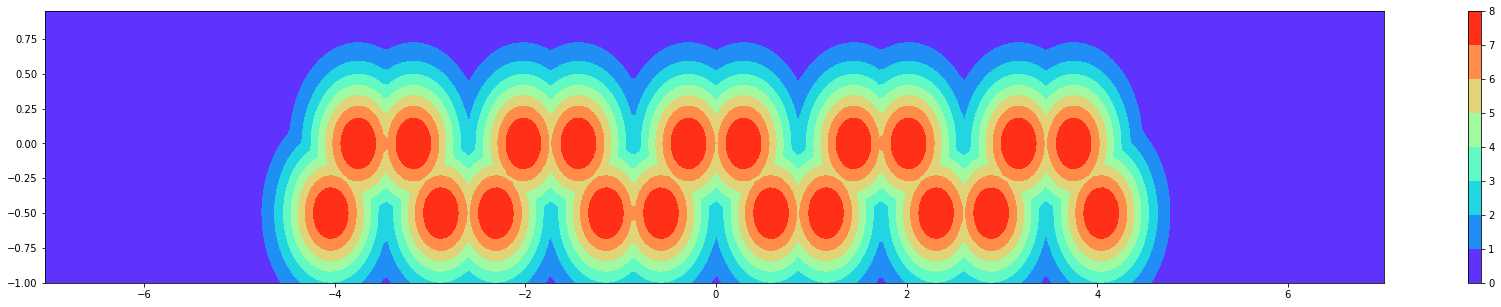

In [34]:
params = Params(Nx = 5)
print(params)

x_tab = honeycomb_1d(params)

x_ = np.arange(params.x_min, params.x_max, params.dx)
y_ = np.arange(params.y_min-0.5, params.y_max+0.5, params.dy) 

nx = len(x_)
ny = len(y_)

X,Y = np.meshgrid(x_, y_,indexing='ij')
R_tab = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        R_tab[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)
        
print(R_tab.shape)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*R_tab, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 8, Ny = 3
Number of plane waves: Nkx = 15, Nky = 5
Nkx_max = 7, Nky_max = 2
Period: a = 1, Side length: b = (0.5773502691896258,)
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Grid size: dx =  0.05, dy = 0.05
Reciprocal lattice vectors: g1 = (2*pi/Lx)[0.5       0.8660254], g2 = (2*pi/Ly)[-0.5        0.8660254]

(96, 2)


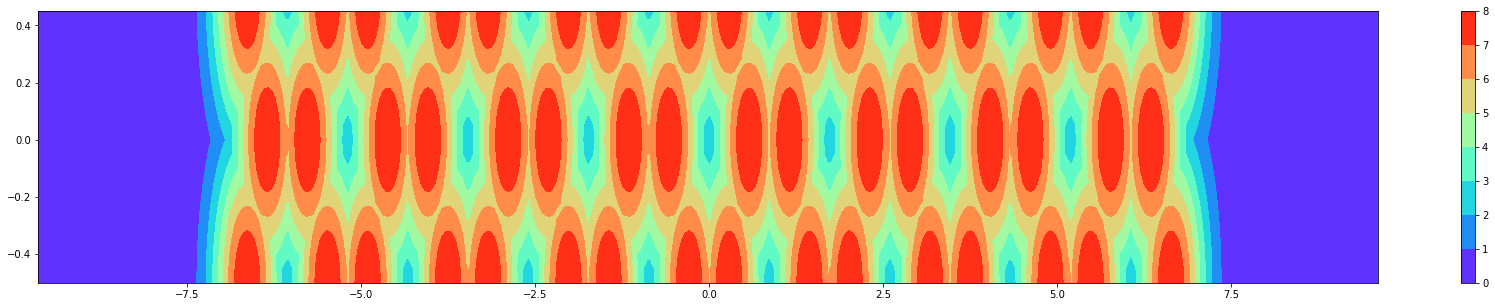

In [35]:
params = Params(Nx=8, Ny=3)
print(params)

x_tab = honeycomb_2d(params)
print(x_tab.shape)

x_ = np.arange(params.x_min, params.x_max, params.dx)
y_ = np.arange(params.y_min, params.y_max, params.dy)
nx = len(x_)
ny = len(y_)

X,Y = np.meshgrid(x_, y_,indexing='ij')
Z = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()



## Calculate coefficients in plane wave expansion

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 3, Ny = 2
Number of plane waves: Nkx = 151, Nky = 25
Nkx_max = 75, Nky_max = 12
Period: a = 1, Side length: b = (0.5773502691896258,)
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Grid size: dx =  0.02, dy = 0.02
Reciprocal lattice vectors: g1 = (2*pi/Lx)[0.5       0.8660254], g2 = (2*pi/Ly)[-0.5        0.8660254]

7.309401076758503


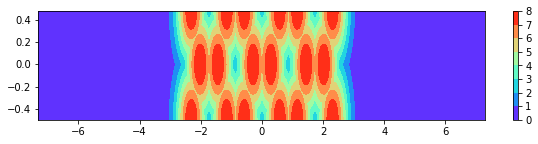

In [51]:
params = Params(Nx=3, Ny=2, Nkx=151, Nky=25, dx=0.02, dy=0.02, padding=5)
print(params)

x_tab = honeycomb_2d(params)

x_ = np.arange(params.x_min, params.x_max, params.dx)
y_ = np.arange(params.y_min, params.y_max, params.dy) 

print(params.x_max)
nx = len(x_)
ny = len(y_)

X,Y = np.meshgrid(x_, y_,indexing='ij')
Z = np.empty([nx,ny])
C = np.zeros([params.Nkx,params.Nky])

nkx0 = np.floor(params.Nkx/2)
nky0 = np.floor(params.Nky/2)

R_tab = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        R_tab[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(10,2))
h = plt.contourf(X, Y, -1*R_tab, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

In [52]:
kx = 0.

R_G_mat = np.zeros([params.Nkx,params.Nky]) 

for ii in range(params.Nkx): 
    for jj in range(params.Nky):
        k = np.array([kx,0]) + (ii-params.Nkx_max)*params.G1 + (jj-params.Nky_max)*params.G2
    
        sum_x = np.trapz(R_tab * np.exp(1j*k[0]*X ), dx=params.dx, axis=0)
        sum_y = np.trapz(sum_x * np.exp(1j*k[1]*y_), dx=params.dy, axis=0)       
        R_G_mat[ii,jj] = 1/(params.Lx*params.Ly)*sum_y

# Rebuild R from Fourier components
u = np.zeros([nx,ny],dtype='complex128')

for ii in range(params.Nkx):
    for jj in range(params.Nky):
        k = np.array([kx,0]) + (ii-params.Nkx_max)*params.G1 + (jj-params.Nky_max)*params.G2        
        u += R_G_mat[ii,jj]* np.exp(-1j*k[0]*X) * np.exp(-1j*k[1]*Y)

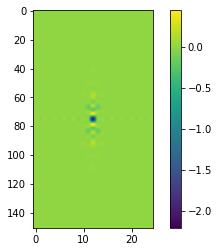

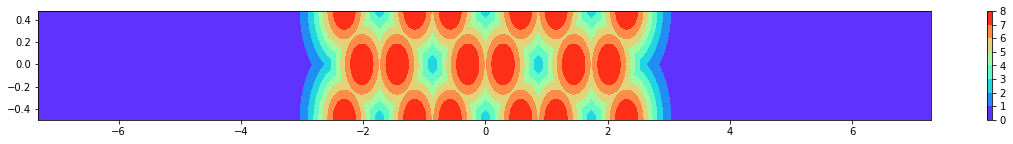

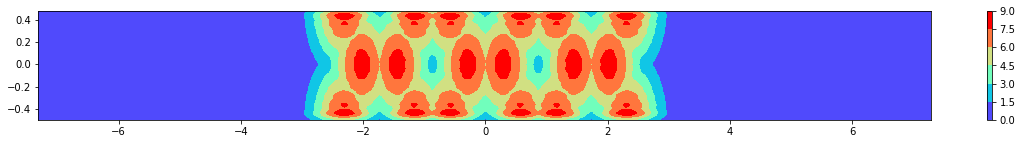

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(R_G_mat);
ax.set_aspect('0.3')
plt.colorbar()
plt.show()

plt.figure(figsize=(20,2))
h = plt.contourf(X, Y, -1*R_tab, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

plt.figure(figsize=(20,2))
h = plt.contourf(X, Y, np.absolute(u), cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

## Build matrix

In [28]:
kx = 0.
ky = 0.1

H = np.zeros([params.Nkx*params.Nky,params.Nkx*params.Nky]) 
E_mat = np.zeros([params.Nkx*params.Nky,params.Nkx*params.Nky]) 

# print(R_G_mat)

for ii in range(params.Nkx): 
    for jj in range(params.Nky): 
        Gn = (ii-params.Nkx_max)*params.G1 + (jj-params.Nky_max)*params.G2
        k = np.array([kx,ky]) + Gn
        H[ii*params.Nky + jj, ii*params.Nky + jj] = 0.5 * (np.linalg.norm(Gn)**2 + 2*k[1] + k[1]**2)
        for kk in range(params.Nky):
            if jj != kk:
                H[ii*params.Nky + kk , ii*params.Nky + jj] += R_G_mat[ii,kk]
                

E_mat = np.linalg.eig(H)
print(E_mat)



(array([1.46504791e+02, 1.74150807e+02, 2.41382198e+00, 4.88043343e+01,
       3.49810138e+01, 1.45673451e+02, 1.73319483e+02, 1.58187558e+00,
       4.79733426e+01, 3.41502030e+01, 1.45026913e+02, 1.72672949e+02,
       9.36417311e-01, 4.73261697e+01, 3.35031405e+01, 1.44565041e+02,
       1.72211083e+02, 4.72742500e-01, 4.68653814e+01, 3.30422235e+01,
       1.44287119e+02, 1.71933519e+02, 1.91563268e-01, 4.65907317e+01,
       3.27680674e+01, 1.44194071e+02, 1.71840788e+02, 9.76145006e-02,
       4.64995016e+01, 3.26772011e+01, 1.44287119e+02, 1.71933519e+02,
       1.91563272e-01, 4.65907317e+01, 3.27680674e+01, 1.44565041e+02,
       1.72211083e+02, 4.72742505e-01, 4.68653814e+01, 3.30422235e+01,
       1.45026913e+02, 1.72672949e+02, 9.36417307e-01, 4.73261697e+01,
       3.35031405e+01, 1.45673451e+02, 1.73319483e+02, 1.58187557e+00,
       4.79733426e+01, 3.41502031e+01, 1.46504790e+02, 1.74150807e+02,
       2.41382197e+00, 4.88043343e+01, 3.49810138e+01]), array([[ 9.99999449

In [29]:
print(H)

[[1.46504781e+02 6.36866004e-03 6.36866004e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.00085771e-02 3.49810320e+01 5.00085771e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.10089669e-01 1.10089669e-01 2.41411824e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.41411824e+00
  1.10089669e-01 1.10089669e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.00085771e-02
  4.88040397e+01 5.00085771e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.36866004e-03
  6.36866004e-03 1.74150796e+02]]
